# Project Air Quality

### Domain Name: Environment Air quality

### Dataset: Air quality of an Italian city

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

**Attributes of the dataset are:**

|Sl No|	|Attribute|	|Description|
|--|	|--|	|--|
|0|	|Date|	|Date (DD/MM/YYYY) |
|1|	|Time|	|Time (HH.MM.SS) |
|2|	|CO(GT)|	|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|3|	|PT08.S1(CO)|	|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4|	|NMHC(GT)|	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5|	|C6H6(GT)|	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|6|	|PT08.S2(NMHC)|	|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|7|	|NOx(GT)|	|True hourly averaged NOx concentration in ppb (reference analyzer) |
|8|	|PT08.S3(NOx)|	|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|9|	|NO2(GT)|	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|10|	|PT08.S4(NO2)|	|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|11|	|PT08.S5(O3)|	|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|12|	|T|	|Temperature in Â°C |
|13|	|RH|	|Relative Humidity (%) |
|14|	|AH|	|AH Absolute Humidity|


### Problem:

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out. 

### Objective:

So we will **predict the Relative Humidity** of a given point of time based on the all other attributes affecting the change in RH.


### <u>Content:<u>

[1) Load data](#load_data)

[2) Basic statistics](#stat)

[3) Dummify Hours](#hr)
    
[4) Co-relation between variables](#corr)

[5) Influence of features on output-RH](#lin)

[6) Baseline Linear Regression](#LR)

[6a) Conclusion of Baseline Linear Regression](#LRcon)

[7) Feature Engineering and testing model](#FE)

[7a) Conclusion of Feature Engineering and testing](#FEcon)

[8) Decision Tree Regression ](#DT)

[9) Random Forest Regression](#RF)

[10) Support Vector Machine](#SVM)

[11) Conclusion](#conclusion)

In [41]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [42]:
#Local path
local_path='C:/SKCY/Python/MLA/'

#### 1) Load data<a name="load_data"></a>

In [77]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv(local_path+'AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   usecols=use)
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [78]:
#See the end records of dataframe
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#drop end rows with NaN values
df_air.dropna(inplace=True)

#### 2) Basic statistics<a name="stat"></a>

In [80]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#### 3) Dumify Hour<a name="hr"></a>

In [81]:
#Split hour from time into new column
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

#### 4) Understand co-relation between variables<a name="corr"></a>

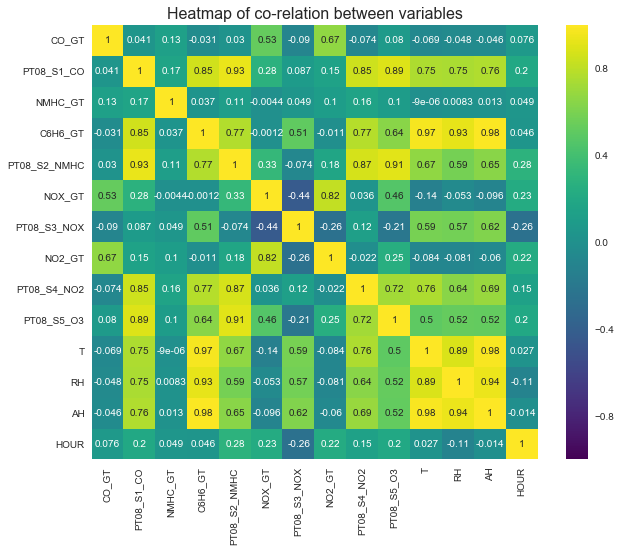

In [83]:
#Use heatmap to see corelation between variables
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

#### 5) Try to understand degree of linearity between RH output and other input features<a name="lin"></a>

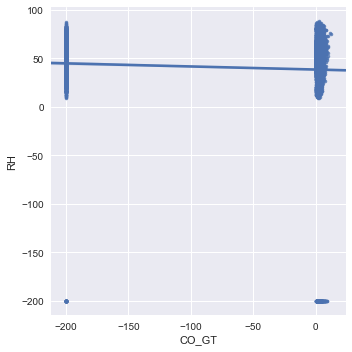

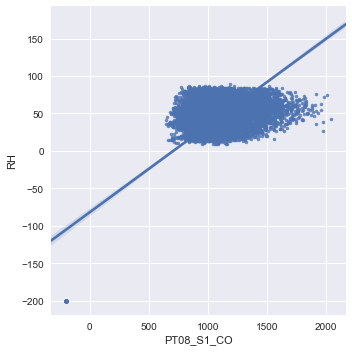

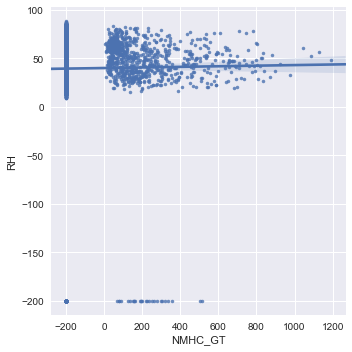

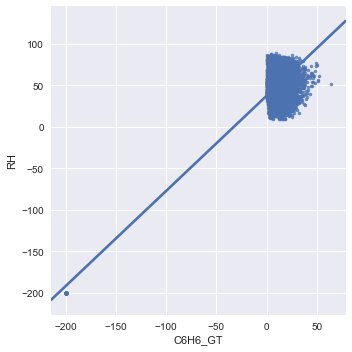

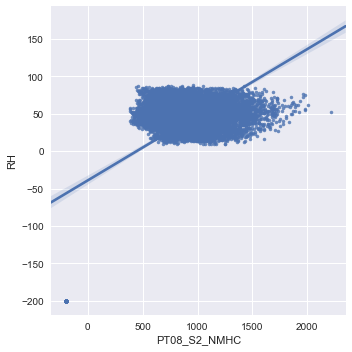

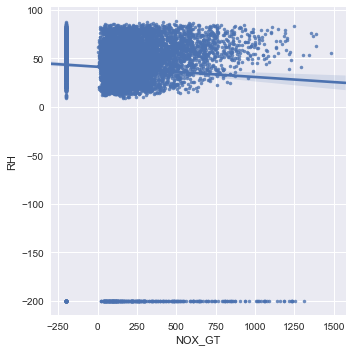

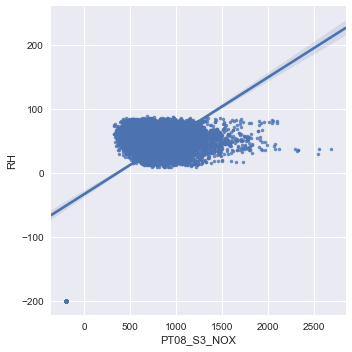

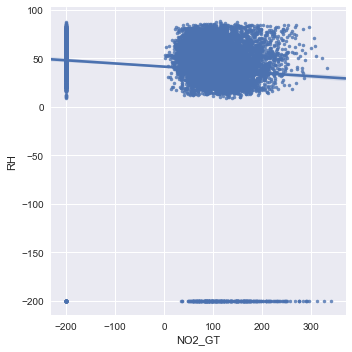

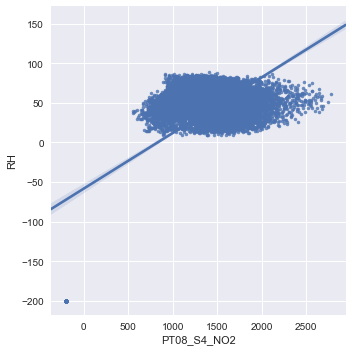

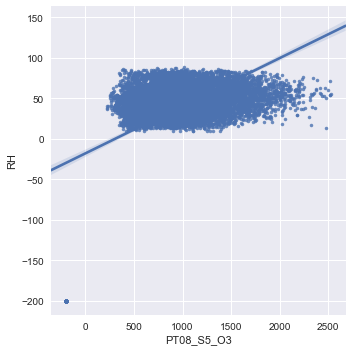

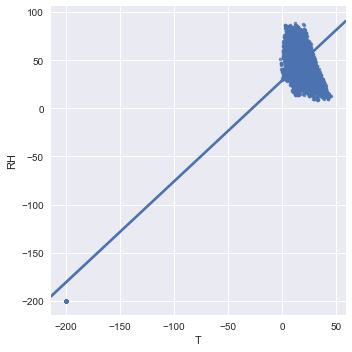

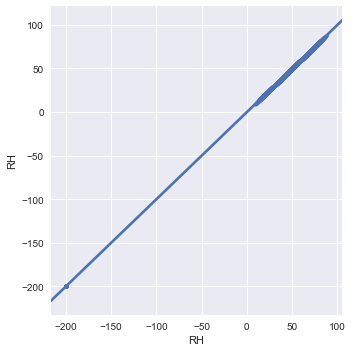

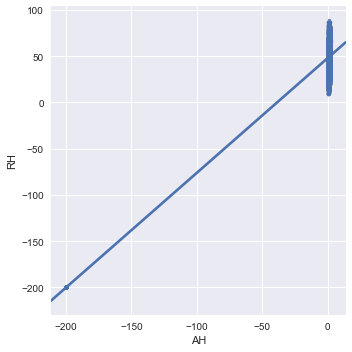

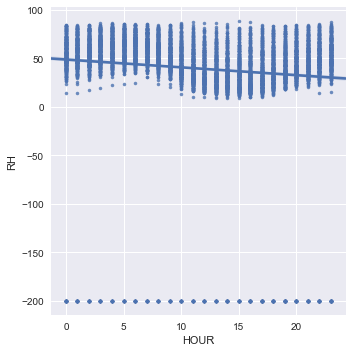

In [84]:
#plot all X-features against output variable RH
col_=col[2:]+['HOUR']
for i in col_:
    sns.lmplot(x=i,y='RH',data=df_air,markers='.')

### 6) Linear Regression<a name="LR"></a>

In [49]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

##### Define Feature (X) and Target (y)

In [50]:
X=df_air[col_].drop('RH',1)     #X-input features
y=df_air['RH']                    #y-input features

##### Normalize Feature variable

In [51]:
ss=StandardScaler()     #initiatilise

In [52]:
X_std=ss.fit_transform(X)     #apply stardardisation

##### Train test split

In [85]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [86]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6549, 13)
Test data size: (2808, 13)


##### Train the model

In [55]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [56]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 39.4845569949631
--------------------------------
Slope:


[('CO_GT', 0.3351557526172744),
 ('PT08_S1_CO', 3.7575821962338516),
 ('NMHC_GT', -2.1398582866046403),
 ('C6H6_GT', -52.209884847362666),
 ('PT08_S2_NMHC', -14.782610537597881),
 ('NOX_GT', 7.7379697976570645),
 ('PT08_S3_NOX', -6.32262907334714),
 ('NO2_GT', -6.269705555202083),
 ('PT08_S4_NO2', 27.015366321356016),
 ('PT08_S5_O3', -0.6865630613012311),
 ('T', -86.85911407323674),
 ('AH', 177.57844825856708),
 ('HOUR', -0.7620466343837523)]

##### Prediction

In [87]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 7.855883512900154


#### <u>6a) Conclusion of baseline linear regression model:<a name="LRcon"></a>

This means that we can predict RH using all the features together with **RMSE as 7.85**. Let us call it as baseline model.

### 7) Feature engineering and testing model:<a name="FE"></a>

Try with multiple feature combination and see if RMSE is improving

##### Build RMSE function

In [88]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=df_air[feature]
    y=df_air['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [59]:
col_.remove('RH')        #remove output

In [60]:
print('List of features:',col_)    #print list of features

List of features: ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR']


In [61]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO_GT', 'PT08_S1_CO'] 33.99554670388261
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT'] 14.688668368722324
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2'] 13.617761424834015
-------------------------
RMSE with Features as ['PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC'] 14.424100451456145
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T'] 9.747884607248787
-------------------------
RMSE with Features as ['PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH'] 7.8825374918831494
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMH

#### <u>7a) Conclusion of Feature Engineering and testing:<a name="FEcon"></a>

After this experiment it looks that baseline model is performing best

### 8) Decision Tree Regression<a name="DT"></a>

Let us try to apply Decision tree regression technique and see if any improvement happens

In [89]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.cross_validation import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

##### Fit the DT model and predict:

In [63]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

##### RMSE of RH prediction

In [90]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.2909144487378372


#### <u>Conclusion:<u>(Decision Tree Regression)

When decision tree regression has been applied we observe significant improvement of **RMSE value to 1.29**

### 9) Random Forest Regression<a name="RF"></a>

Let us apply Random Forest regression and measure RMSE

In [65]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

##### Fit the RF model and predict

In [66]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

##### RMSE of RH prediction

In [67]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.7676337731539759


##### Lets try to improve on baseline RF model

In [68]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [69]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [70]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [92]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 1.8980135428189278


#### <u>Conclusion: Random Forest

Applying Random Forest regression the predicted **RMSE has improved to 0.76**, the default RF algorithm is giving better RMSE value than grid search applied different parameters.

### 10) Support Vector Machine<a name="SVM"></a>

In [73]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()

In [74]:
sv_model=sv_reg.fit(X_train,y_train)    #train the model

In [75]:
y_pred_sv=sv_model.predict(X_test)         #predict

In [93]:
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 18.190430029307034


## Conclusion:<a name="conclusion"></a>

For designing the model for predicting RH, I have applied Linear Regression, Decision Tree, Random Forest, Support Vector Machine. When tested on test data below are RMSE obtained from different algorithms:

**RMSE:** 

-Linear Regression: 7.84

-Decision Tree: 1.29

**-Random Forest: 0.76**

-Support Vector Machine: 18.19

<u>Hence Random Forest algorithm is selected for the prediction of RH using the features.</u>

**Future:** 
Going forward, I would like to try if applying PCA and using day of the month and month of the year as variable, whether model RMSE of prediction gives a better result.